In [34]:
!pip install keras
! pip install tensorflow --upgrade


In [28]:
# data/boston_housing_data.py

import tensorflow as tf
from sklearn.preprocessing import StandardScaler

def load_data():
    # Load the dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

    # Standardize the features (important for regression tasks)
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    return (x_train, y_train), (x_test, y_test)


In [29]:
# models/dnn_model.py

import tensorflow as tf
from tensorflow.keras import layers, models

def build_dnn_model(input_shape=(13,)):
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # Output layer for regression
    ])

    model.compile(optimizer='adam',
                  loss='mse',  # Mean Squared Error for regression
                  metrics=['mae'])  # Mean Absolute Error for evaluation
    return model


In [30]:
# models/cnn_model.py

import tensorflow as tf
from tensorflow.keras import layers, models

def build_cnn_model(input_shape=(13,)):
    model = models.Sequential([
        layers.Reshape((input_shape[0], 1), input_shape=input_shape),
        layers.Conv1D(32, 3, activation='relu'),
        layers.MaxPooling1D(2),
        layers.Conv1D(64, 3, activation='relu'),
        layers.GlobalAveragePooling1D(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # Output layer for regression
    ])

    model.compile(optimizer='adam',
                  loss='mse',  # Mean Squared Error for regression
                  metrics=['mae'])  # Mean Absolute Error for evaluation
    return model


In [31]:
# train.py

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load Boston Housing data
(x_train, y_train), (x_test, y_test) = load_data()

# Build the DNN model (or the CNN model)
model = build_dnn_model()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model
history = model.fit(x_train, y_train, epochs=100,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

# Save the trained model
model.save('dnn_boston_housing_model.keras')

# Save the training history
import pickle
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 557.6240 - mae: 21.8930 - val_loss: 533.0115 - val_mae: 21.3823 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 482.6408 - mae: 20.0257 - val_loss: 462.6003 - val_mae: 19.7248 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 445.6528 - mae: 19.1524 - val_loss: 370.7105 - val_mae: 17.3052 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 322.0519 - mae: 15.8196 - val_loss: 263.6278 - val_mae: 13.9805 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 233.2187 - mae: 12.9654 - val_loss: 167.8554 - val_mae: 10.9187 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 144.0106 - mae: 9.7518 - val_loss: 112.2490 - val_mae: 8.5378 - learning_rate: 0.0010
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 82.4545 - mae: 7.1441 - val_loss: 86.7201 - val_mae: 7.4

In [36]:
# evaluate.py

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.losses import mse

# Load Boston Housing data
(x_train, y_train), (x_test, y_test) = load_data()

# Load the trained model
#model = tf.keras.models.load_model('dnn_boston_housing_model.h5')
model = keras.models.load_model("dnn_boston_housing_model.keras", custom_objects={'mse': mse})


# Evaluate the model
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest MAE: {test_mae}')


4/4 - 1s - 167ms/step - loss: 21.9529 - mae: 3.3917

Test MAE: 3.3916640281677246


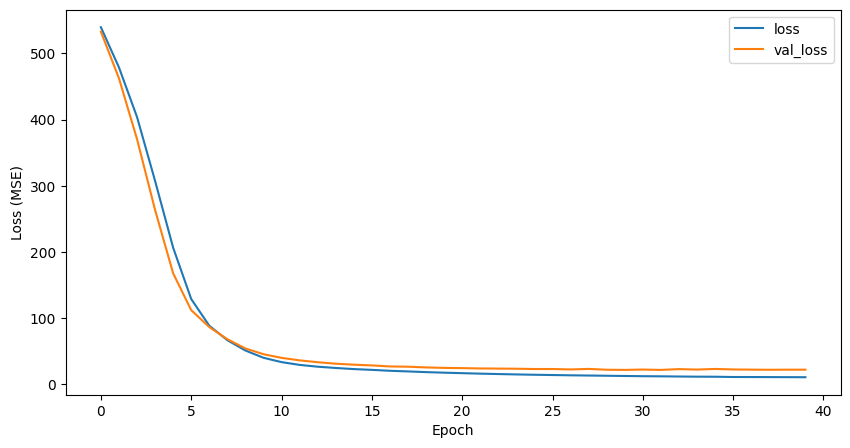

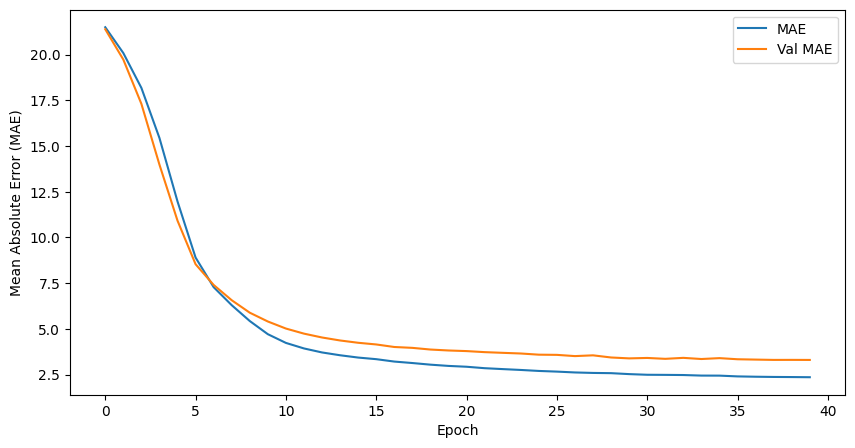

In [37]:
# utils/plot_history.py

import matplotlib.pyplot as plt
import pickle

def plot_history(history_file='history.pkl'):
    with open(history_file, 'rb') as f:
        history = pickle.load(f)

    plt.figure(figsize=(10, 5))
    plt.plot(history['loss'], label='loss')
    plt.plot(history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend(loc='upper right')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(history['mae'], label='MAE')
    plt.plot(history['val_mae'], label='Val MAE')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.legend(loc='upper right')
    plt.show()

if __name__ == '__main__':
    plot_history()
